# **2.1 M-Estimation**

*M-Estimation* proposes the following objective function to be minimized:

$$ \sum_{i=1}^{n} \rho (e_{i}) = \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{T} \beta ) $$

We can see $\rho $ is the contribution of each residual to the *M-estimation* objective function. $\rho(\cdot)$ should have the following properties:

1. $\rho (e) \geq 0 $  i.e. $\rho $ cannot be negative
2. $\rho (0) = 0$ i.e. When the argument of $\rho $ is 0, $\rho $ is also $0$
3. $\rho (e) = \rho (-e)$ i.e. $\rho $ is symmetric
4. When $|e_{i}| > |e_{j}|$, then $\rho (e_{i})> \rho (e_{j})$ i.e. $\rho $ is monotone

Let's take a quick look of some $\rho$ examples. Two of the popular $\rho$ functions are $\rho (e) = e^{2}$ and $\rho (e) = |e|$. We will talk more about them later in this lesson.

We then take the partial derivatives of this objective function with respect to $\beta$ and set them to $0$. We will get the following equations:

$$ \begin{bmatrix}
\frac{\partial \rho}{\partial \beta_1} \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{T} \beta) \\
\frac{\partial \rho}{\partial \beta_2} \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{T} \beta) \\
. \\
. \\
. \\
\frac{\partial \rho}{\partial \beta_p} \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{T} \beta)

\end{bmatrix} 
= \begin{bmatrix}
0 \\ 
0 \\
. \\
. \\
. \\
0 \\
\end{bmatrix} 
$$

Where,

$X_{i}^{T} \beta$ $= \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \beta_p X_{ip}$

Here are the steps for solving the equation:

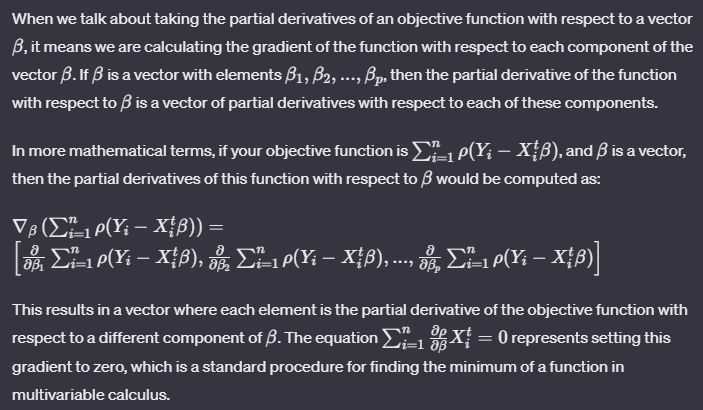

* **Partial Derivatives with Respect to $\beta$:** 

$\qquad$ Since $\rho(e_i)$ is a function of $e_i = Y_{i} - X_{i}^{T} \beta$, its derivative with respect to $\beta$ involves **chain rule**:

$\qquad \qquad \Large\frac{\partial \rho}{\partial \beta_j} = \frac{\partial \rho}{\partial e_i} \cdot \frac{\partial e_i}{\partial \beta_j}$

* **Introducing $\psi$ function:**

$\qquad$ Let's assign $\psi (e_i) = \frac{\partial \rho }{\partial e_i} (e_i)$. It is the partial derivative of function $\rho(e_i)$ with respect to $e_i$. $\ \psi$ is called an **influence function.** <u> This function measures how much influence each residual $r_i$ has on the estimation of $\beta$. </u>

$\qquad \qquad \psi(e_i) = \frac{\partial \rho}{\partial e_i} $

$\qquad$ And because the only non-zero value after taking derivative with respect to $\beta_j$ in the polynomial $X_{i}^{T} \beta$ $= \beta_1 X_{i1} + ... +\beta_j X_{ij} + ... + \beta_p X_{ip}$ 

$\qquad$ is $X_{ij} \rightarrow \large\frac{\partial \rho}{\partial \beta_j} = -X_{ij}$ :

$\qquad \qquad \large\frac{\partial \rho}{\partial \beta_j} = -\psi(e_i) X_{ij} $

* **Setting the Gradient to Zero:**

$\qquad \qquad \begin{bmatrix}
\sum_{i=1}^{n} -\psi(e_i) X_{i1} \\
\sum_{i=1}^{n} -\psi(e_i) X_{i2} \\
. \\
. \\
. \\
\sum_{i=1}^{n} -\psi(e_i) X_{ip}
\end{bmatrix}=
\qquad \qquad \begin{bmatrix}
\sum_{i=1}^{n} \psi(e_i) X_{i1} \\
\sum_{i=1}^{n} \psi(e_i) X_{i2} \\
. \\
. \\
. \\
\sum_{i=1}^{n} \psi(e_i) X_{ip}
\end{bmatrix} 
= \begin{bmatrix}
0 \\ 
0 \\
. \\
. \\
. \\
0 \\
\end{bmatrix}  $






* **Defining the Weight Function:**

$\qquad \qquad w(e_i) = \frac{\psi(e_i)}{e_i} \quad \text{and} \quad w_i = w(e_i) $

$\qquad \qquad \begin{bmatrix}
\sum_{i=1}^{n} w_i e_i X_{i1} \\
\sum_{i=1}^{n} w_i e_i X_{i2} \\
. \\
. \\
. \\
\sum_{i=1}^{n} w_i e_i X_{ip} \\
\end{bmatrix} $
$
= \begin{bmatrix}
0 \\ 
0 \\
. \\
. \\
. \\
0 \\
\end{bmatrix}  $

Why did we do all these steps? If you look at the above equation, it is the same partial derivative equation from the WLS lesson. We have transformed the *M-estimation* to weighted least square regression. 

Now, we have to calculate the estimates of *M-estimation*. From the above description, it is the same as solving a WLS problem. <u> From our weight formula, we know the weights depend on residuals. The residuals depend on estimated coefficients. The coefficients depend on weights. It is a circle. </u> We usually would start from estimating the coefficients using OLS. Then, we'd get the residuals and estimate the weights, and we would estimate weighted least square regression and repeat the whole process again. This is called **iterative reweighted least squares** **regression (IRLS).**

Here are the steps of **iterative reweighted least squares** regression:

1. Use OLS to estimate initial coefficients.
2. Obtain the residuals of the OLS model and generate weights.
3. Estimate coefficients using WLS and the weights from Step 2.
4. Plug coefficients from WLS into the linear model and calculate new residuals and repeat from Step 2 to Step 4 until the **coefficients converge.**

## $\rho()$ Functions: Huber Method

After setting out the steps to run an M-estimation using IRLS in the last section, we now need to find weights. How should we find weights? From the last section, we know weight functions can be derived from $\rho $ functions. In this section, we are going to introduce two commonly used $\rho $ functions: the Huber method and bisquare method. We will use them to derive weight functions.

The $\rho $ function for the **Huber method** is as follows:

$$ 
\rho_{_{Huber}} (e) = \begin{cases} 
  \frac{1}{2}e^{2}, & \text{ if } |e| \leq k \\ 
  k |e| - \frac{1}{2}k^{2}, & \text{ if } |e| > k 
\end{cases} 
$$

$k$ is called a **tuning constant.** <u> A smaller $k$ will make the objective function more resistant to outliers. </u> We usually set $k = 1.345 \sigma$. $\ \sigma$ is the standard deviation of the errors. Why 1.345? If the errors are normally distributed, we will get 95% efficiency when we estimate the errors using residuals. This level of efficiency is similar to that used for OLS regression (95%).

One more point: <u> We usually use standard deviation of residuals to estimate $\sigma$. </u> However, one outlier can make the estimated value of the standard deviation of residuals very sensitive because the mean is part of the calculation of standard deviation. Mean is sensitive to outliers. Instead, we use **median absolute deviation (MAD)** = $\text{median} | \text{residuals}|$ to estimate the standard deviation of errors $\sigma$.

Now that we know the $\rho $ function for the Huber method, we can derive the weight function. The weight function for the Huber method is as follows:

$$ 
w_{_{Huber}} (e) = \begin{cases} 
  1, & \text{ if } |e| \leq k \\ 
  \frac{k}{|e|}, & \text{ if } |e| > k 
\end{cases} 
$$

**Figure 2: Huber Method Weight Function Chart**

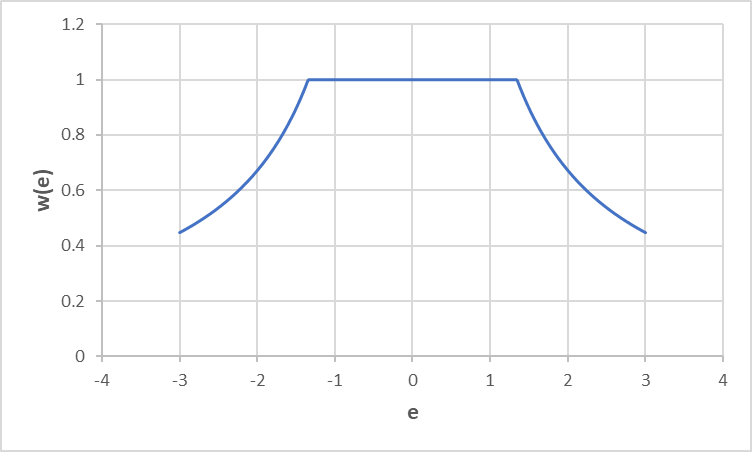


From Figure 2, we can see that the weights for data points are the same when their errors are within (-1.345, 1.345). Once the error passes the band, the value of the weight starts to drop quickly, which will give less weight to outliers.


## $\rho()$ Functions: Bisquare Method

The $\rho $ function for the **bisquare method** is as follows:

$$ 
\rho_{_{Bisquare}} = \begin{cases} 
  \frac{k^{2}}{6} (1- (1 - (\frac{e}{k})^{2})^{3} ), & \text{ if } |e| \leq k \\ 
  \frac{k^{2}}{6}, & \text{ if } |e| > k 
\end{cases} 
$$

The concept of $k$ here is the same as the $k$ in the Huber method. For the bisquare method, $k = 4.685 \sigma$. It also uses MAD to estimate standard deviation of error.

The weight function for the bisquare method is as follows:

$$ 
w_{_{Bisquare}} (e) = \begin{cases} 
  (1- (\frac{e}{k})^{2})^{2},  & \text{ if } |e| \leq k \\ 
  0,  & \text{ if } |e| > k 
\end{cases} 
$$

**Figure 3: Bisquare Method Weight Function Chart**

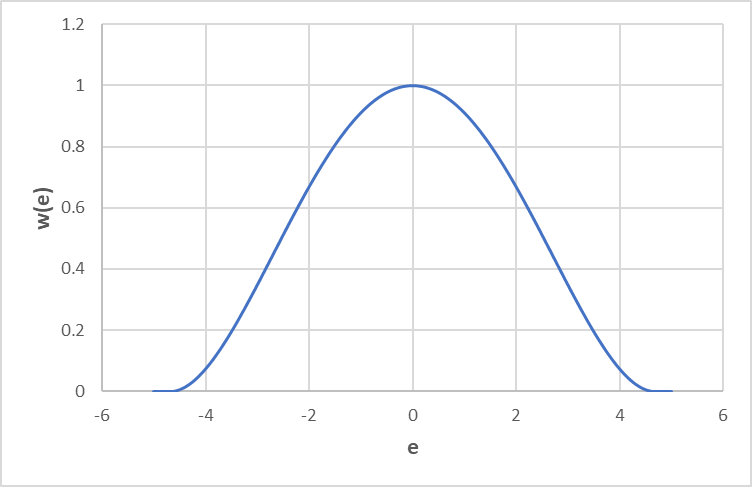


We can see from Figure 3 that the bisquare method de-emphasizes outliers faster than the Huber method. The bisquare method starts to decrease the weight when error begins to show up. 

The residual sum of a square for OLS is also a $\rho $ function form.

$$ 
\rho (e)= e^{2} 
$$

This function also meets all of the properties of an $\rho $ function.

The weight function for OLS is:

$$ 
w(e)=1 
$$

From the weight function, we can see OLS gives all data points a weight of $1$ regardless of their outlier status.

### Pros and Cons of M-estimators

* Both **Huber** and **Bisquare** methods <u> assign less weight to outliers </u>, this makes them better regression methods than **OLS**.

* After running a **robust regression** model, you can check **weights** associated with each data point to <u> identify outliers. </u>

* **Bisquare** method starts to de-emphasize a data point the moment the error shows up. However, a bisquare result is <u> sensitive to the choice of initial coefficient estimates. </u> One way to get away from this issue is to use the **Huber** method at the beginning to get the coefficients. Then, use the Huber method coefficients in the bisquare method.

* Another issue with the **Huber** method and the **bisquare** method is that they still <u> cannot handle **leverage points** *(points with large X values)* well. </u> There is another branch of robust regression to handle this issue: bounded influence regression. Some examples of this method include least trimmed squares, least median squares, etc. 

_____________________

## **3. Foreign Exchange Market Analysis Using Robust Regression**

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M2/fin_data_set.csv")
data_set.head(10)

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016
5,1/11/2016,0.001928,-0.057749,-0.052774,0.000990,-0.003527,-0.078947,0.013146,0.001378,2016
6,1/12/2016,0.002431,-0.034475,-0.030882,0.008069,0.003982,0.200000,-0.025950,-0.007590,2016
7,1/13/2016,-0.000404,0.004667,0.001314,-0.024941,-0.010137,0.023810,-0.017127,-0.001290,2016
8,1/14/2016,0.001617,-0.035540,0.023622,0.016417,0.005788,0.116279,0.015489,0.003875,2016
9,1/15/2016,-0.001312,-0.002409,-0.057051,-0.021466,-0.030544,-0.070833,-0.030982,-0.002487,2016


In [3]:
# Robust Linear Regression model, Huber method
rr_huber = sm.RLM(data_set["DXY"], sm.add_constant(data_set["X10Y_TBY"]), M=sm.robust.norms.HuberT())  # RLM: Robust Linear Model
rr_huber_results = rr_huber.fit()
rr_huber_results.summary()  # Method: IRLS   means IRLS: Iterative Re-weighted Least Squares
                                                # 1. start with an OLS to calculate initial coefficient estimators and get residuals to estimate variance of error terms.
                                                # 2. use residuals to estimate variance of error terms to calculate weights.
                                                # 3. run a WLS model with weights from step 2. to re-calculate coefficient estimators.
                                                # 4. plug the re-calculated coefficients from WLS into the linear model and re-calculate residuals.
                                                # 5. repeat from step 2. to step 4. until coefficients CONVERGE.

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 16 Nov 2023                                         
Time:                        11:53:11                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.673e-05      0.000      0.367      0.714      -0.000       0.001
X10Y_TBY       0.0446      0.011      4.152      0.000       0.024       0.066
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [4]:
# Robust Linear Regression model, Bisquare method
rr_bisquare = sm.RLM(
    data_set["DXY"],
    sm.add_constant(data_set["X10Y_TBY"]),
    M=sm.robust.norms.TukeyBiweight(),
)
rr_bisquare_results = rr_bisquare.fit()
rr_bisquare_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                    DXY   No. Observations:                  250
Model:                            RLM   Df Residuals:                      248
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 16 Nov 2023                                         
Time:                        12:04:52                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.698e-05      0.000      0.254      0.800      -0.000       0.001
X10Y_TBY       0.0515      0.011      4.797      0.000       0.030       0.073
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [5]:
# WLS model
model_1 = smf.ols("DXY ~ X10Y_TBY", data=data_set).fit()

# Add Absolute residuals and fitted values to dataset columns
data_set["abs_residuals"] = np.abs(model_1.resid)
data_set["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals ~ fitted_values", data=data_set).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
data_set["weights"] = weights

# WLS model
Y = data_set["DXY"].tolist()
X = data_set["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, data_set["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.23e-07
Time:                        12:05:49   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.730      -0.000       0.001
x1             0.0516      0.010      5.253      0.000       0.032       0.071
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.475
Skew:                           0.063   Prob(JB):                     7.99e-06
Kurtosis:                       4.496   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

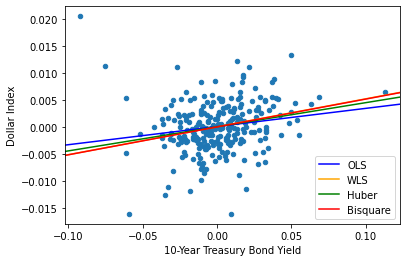

In [6]:
# Scatter Plot of U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return with Different Regression Lines

# scatter-plot data
scatt = data_set.plot(x="X10Y_TBY", y="DXY", kind="scatter")
scatt.set(xlabel="10-Year Treasury Bond Yield", ylabel="Dollar Index")

# plot regression lines
abline_plot(model_results=model_1, ax=scatt, color="blue", label="OLS")
abline_plot(model_results=model_WLS, ax=scatt, color="orange", label="WLS")
abline_plot(model_results=rr_huber_results, ax=scatt, color="green", label="Huber")
abline_plot(model_results=rr_bisquare_results, ax=scatt, color="red", label="Bisquare")
plt.legend(loc="lower right")
plt.show()